# **Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

# **Accessing the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/My Drive/TCS iON Internship/webmd.csv')

In [5]:
df1.shape

(362806, 12)

In [6]:
df1.head(1)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0


In [7]:
df1.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [9]:
df1.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [10]:
df1.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [11]:
df1.duplicated().sum()

943

In [12]:
df1.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [13]:
df2 = pd.read_csv('/content/drive/My Drive/TCS iON Internship/data1.csv')

In [14]:
df2.shape

(400000, 6)

In [15]:
df2.columns

Index(['patient_id', 'name', 'gender', 'age', 'race', 'side_effects'], dtype='object')

In [16]:
df2.head(1)

,patient_id,name,gender,age,race,side_effects
0,145440,Monica Hunter,female,0-10,Hispanic,Moderate Side Effects


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   patient_id    400000 non-null  int64 
 1   name          400000 non-null  object
 2   gender        400000 non-null  object
 3   age           400000 non-null  object
 4   race          400000 non-null  object
 5   side_effects  400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 18.3+ MB


In [18]:
df2.describe()

,patient_id
count,400000.000000
mean,199884.948487
std,115463.849224
min,1.000000
25%,99856.500000
50%,200121.500000
75%,299950.000000
max,399999.000000


In [19]:
df2.nunique()

patient_id      253218
name            192408
gender               2
age                 10
race                 4
side_effects         5
dtype: int64

In [20]:
df2.duplicated().sum()

0

In [21]:
df2.isna().sum()

patient_id      0
name            0
gender          0
age             0
race            0
side_effects    0
dtype: int64

In [22]:
df2['side_effects'].value_counts()

Moderate Side Effects            112052
Severe Side Effects               88079
Mild Side Effects                 79910
Extremely Severe Side Effects     72077
No Side Effects                   47882
Name: side_effects, dtype: int64

# **Data Preparation**

#### **Adding Name and Race columns**

In [23]:
columns_to_concat = ['name', 'race']
concatenated_columns = pd.concat([df2[columns_to_concat], df1], axis=1)

df = pd.DataFrame(concatenated_columns)
df.head(1)

,name,race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Monica Hunter,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0


In [24]:
df.to_csv('Data(name, race.csv)', index=False)

In [25]:
df.shape

(400000, 14)

In [26]:
df.columns

Index(['name', 'race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           400000 non-null  object 
 1   race           400000 non-null  object 
 2   Age            362806 non-null  object 
 3   Condition      362806 non-null  object 
 4   Date           362806 non-null  object 
 5   Drug           362806 non-null  object 
 6   DrugId         362806 non-null  float64
 7   EaseofUse      362806 non-null  float64
 8   Effectiveness  362806 non-null  float64
 9   Reviews        362769 non-null  object 
 10  Satisfaction   362806 non-null  float64
 11  Sex            362806 non-null  object 
 12  Sides          362806 non-null  object 
 13  UsefulCount    362806 non-null  float64
dtypes: float64(5), object(9)
memory usage: 42.7+ MB


In [28]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [29]:
df.nunique()

name             192408
race                  4
Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [30]:
df.isna().sum()

name                 0
race                 0
Age              37194
Condition        37194
Date             37194
Drug             37194
DrugId           37194
EaseofUse        37194
Effectiveness    37194
Reviews          37231
Satisfaction     37194
Sex              37194
Sides            37194
UsefulCount      37194
dtype: int64

## **Data Cleaning**

### **Missing value handling**

In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum()

name             0
race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [33]:
# Handling instances with whitespaces
for i in df:
    df[i]=np.where(df[i]==" ",np.NAN,df[i])

df.isna().sum()

name                 0
race                 0
Age              12199
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41824
Satisfaction         0
Sex              26533
Sides            17454
UsefulCount          0
dtype: int64

In [34]:
df.dropna(inplace = True)
df.isna().sum()

name             0
race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [35]:
# Handling instances with double whitespaces
for i in df:
    df[i]=np.where(df[i]=="  ",np.NAN,df[i])

df.isna().sum()

name             0
race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [36]:
df.dropna(inplace = True)
df.isna().sum()

name             0
race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### **Duplicates handling**

In [37]:
df.duplicated().sum()

0

In [38]:
df.shape

(280123, 14)

In [39]:
df.nunique()

name             152048
race                  4
Age                  11
Condition          1584
Date               4517
Drug               5014
DrugId             4522
EaseofUse             6
Effectiveness         6
Reviews          216363
Satisfaction          6
Sex                   2
Sides              1594
UsefulCount         144
dtype: int64

In [40]:
df['Drug'].value_counts()

cymbalta                   3949
lexapro                    3347
lisinopril                 3263
lisinopril solution        3263
effexor xr                 2893
                           ... 
berinert kit                  1
peramivir (pf) solution       1
sodium edecrin vial           1
eprosartan mesylate           1
fenoprofen calcium            1
Name: Drug, Length: 5014, dtype: int64

In [41]:
# Count the occurrences of each drug
drug_counts = df['Drug'].value_counts()

# Count the number of unique identities with count 1
unique_count_1 = sum(drug_counts == 1)

# Print the result
print("Number of unique identities with count 1:", unique_count_1)

Number of unique identities with count 1: 1046


## **Feature Extraction**

**Date**

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [43]:
df.columns

Index(['name', 'race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month'],
      dtype='object')

**Side Effects**

In [44]:
# Split the 'Sides' column into multiple columns
split_sides = df['Sides'].str.split(', ', expand=True)

# Rename the split columns
split_sides.columns = [f'Side {i+1}' for i in range(split_sides.shape[1])]

# Concatenate the split columns to the original DataFrame
df = pd.concat([df, split_sides], axis=1)

df.head(1)

,name,race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,...,Side 8,Side 9,Side 10,Side 11,Side 12,Side 13,Side 14,Side 15,Side 16,Side 17
0,Monica Hunter,Hispanic,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,...,None,None,None,None,None,None,None,None,None,None


In [45]:
# Count the number of comma-separated strings in the 'Sides' column and create a new column 'Count'
df['No.of Side effects'] = df['Sides'].str.count(',') + 1

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280123 entries, 0 to 362805
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   name                280123 non-null  object        
 1   race                280123 non-null  object        
 2   Age                 280123 non-null  object        
 3   Condition           280123 non-null  object        
 4   Date                280123 non-null  datetime64[ns]
 5   Drug                280123 non-null  object        
 6   DrugId              280123 non-null  float64       
 7   EaseofUse           280123 non-null  float64       
 8   Effectiveness       280123 non-null  float64       
 9   Reviews             280123 non-null  object        
 10  Satisfaction        280123 non-null  float64       
 11  Sex                 280123 non-null  object        
 12  Sides               280123 non-null  object        
 13  UsefulCount         280123 no

In [47]:
df.nunique()

name                  152048
race                       4
Age                       11
Condition               1584
Date                    4517
Drug                    5014
DrugId                  4522
EaseofUse                  6
Effectiveness              6
Reviews               216363
Satisfaction               6
Sex                        2
Sides                   1594
UsefulCount              144
Year                      14
Month                     12
Side 1                   467
Side 2                   213
Side 3                   318
Side 4                   344
Side 5                   297
Side 6                   236
Side 7                   204
Side 8                   176
Side 9                   131
Side 10                  103
Side 11                   68
Side 12                   39
Side 13                   23
Side 14                   12
Side 15                    8
Side 16                    5
Side 17                    2
No.of Side effects        17
dtype: int64

In [48]:
df['Severity of Side effects'] = 'No symptoms'

# Assign severity levels based on the 'No.of Side effects' values
df.loc[df['No.of Side effects'].isin([0]), 'Severity of Side effects'] = 'No Side Effect'
df.loc[df['No.of Side effects'].isin([1, 2, 3, 4]), 'Severity of Side effects'] = 'Mild'
df.loc[df['No.of Side effects'].isin([5, 6, 7, 8]), 'Severity of Side effects'] = 'Moderate'
df.loc[df['No.of Side effects'].isin([9, 10, 11, 12]), 'Severity of Side effects'] = 'Severe'
df.loc[df['No.of Side effects'].isin([13, 14, 15, 16, 17]), 'Severity of Side effects'] = 'Extreme'

In [49]:
df.to_csv('Data Split', index = False)

# **Plots**

#### **Univariate Plots**

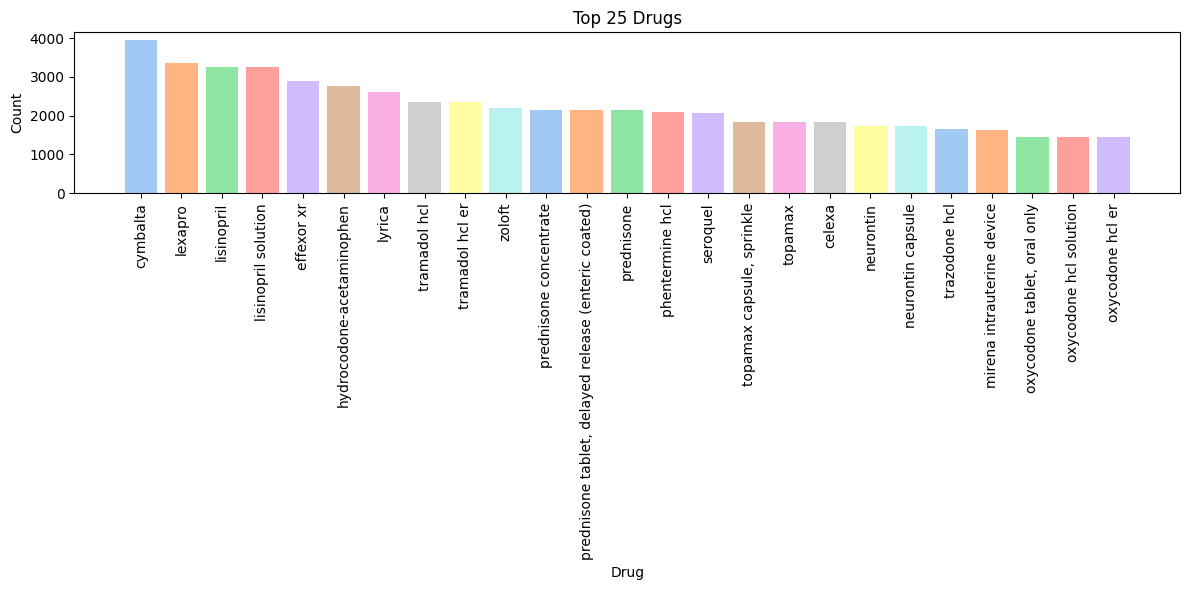

In [50]:
#Top 25 Drugs

# Sort the data frame by the "Drug" column
sorted_df = df['Drug'].value_counts().reset_index().rename(columns={'index': 'Drug', 'Drug': 'Count'})
sorted_df = sorted_df.sort_values('Count', ascending=False)

# Get the top 25 drugs
top_25_drugs = sorted_df.head(25)

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_25_drugs['Drug'], top_25_drugs['Count'], color = colors)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Top 25 Drugs')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

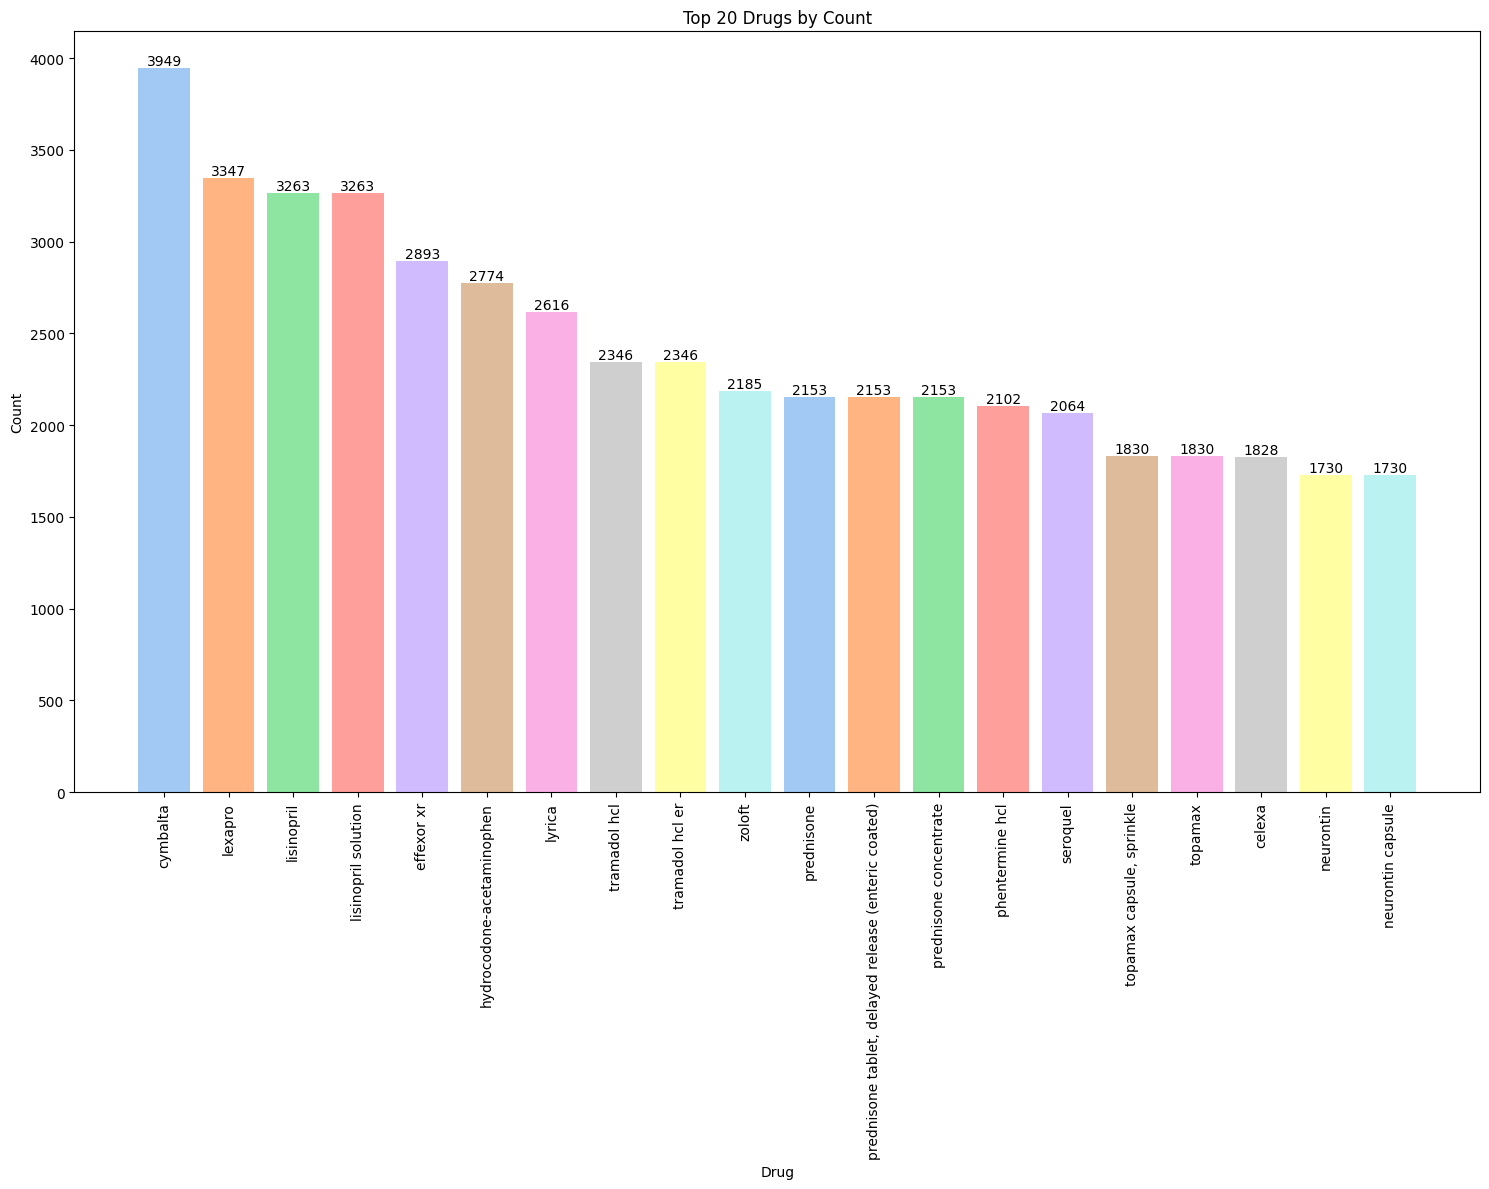

In [51]:
# Count the occurrences of each drug
drug_counts = df['Drug'].value_counts()

# Get the top 25 drugs
top_20_drugs = drug_counts.head(20)

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(15, 12))
bars = plt.bar(top_20_drugs.index, top_20_drugs.values, color = colors)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Top 20 Drugs by Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

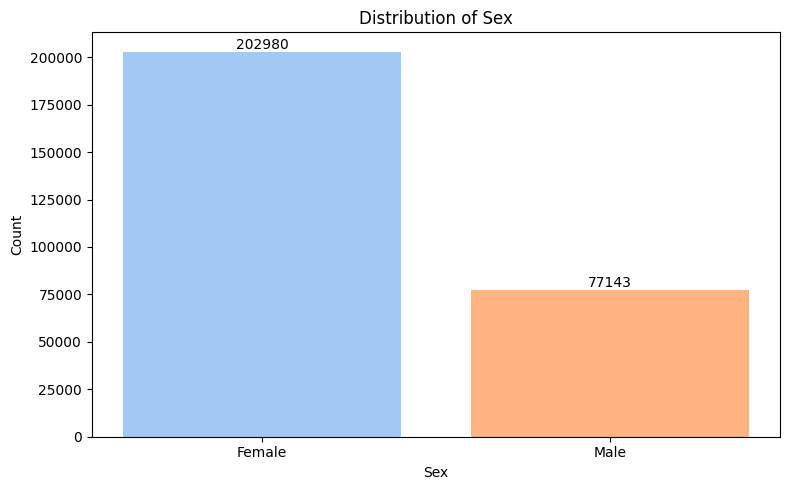

In [52]:
#Sex

# Get the value counts of the 'Sex' column
sex_counts = df['Sex'].value_counts()

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(sex_counts.index, sex_counts.values, color = colors)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

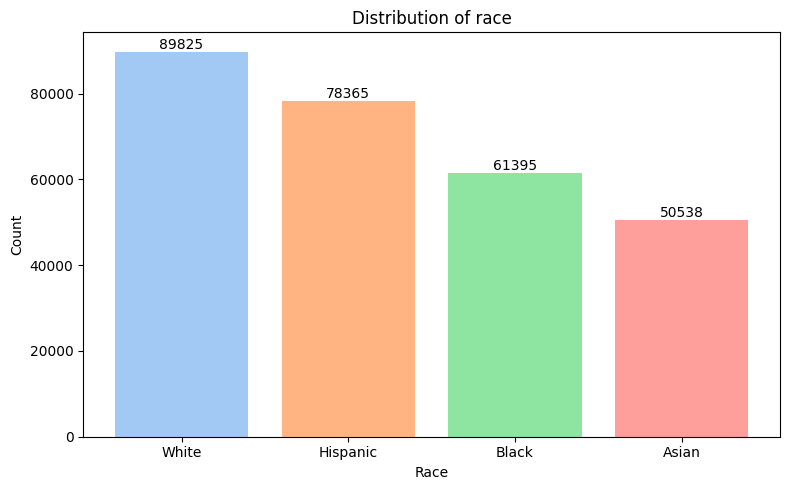

In [53]:
#Race

# Get the value counts of the 'Sex' column
race_counts = df['race'].value_counts()

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(race_counts.index, race_counts.values, color = colors)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

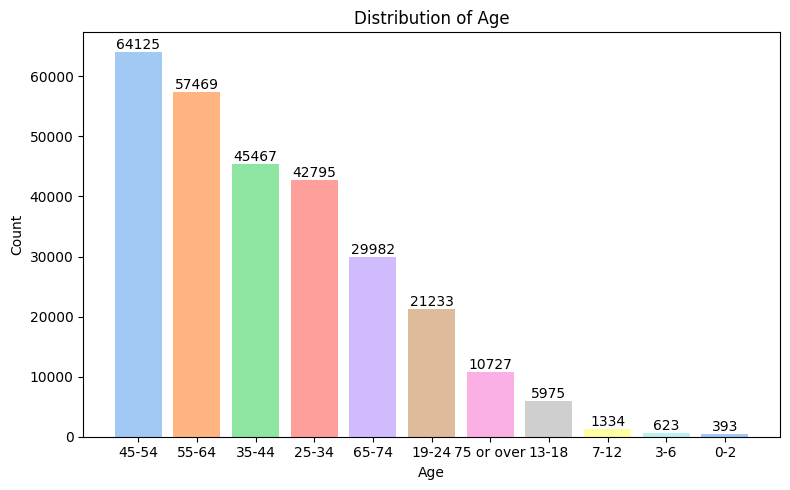

In [54]:
#Age

# Get the value counts of the 'Sex' column
age_counts = df['Age'].value_counts()

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color = colors)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

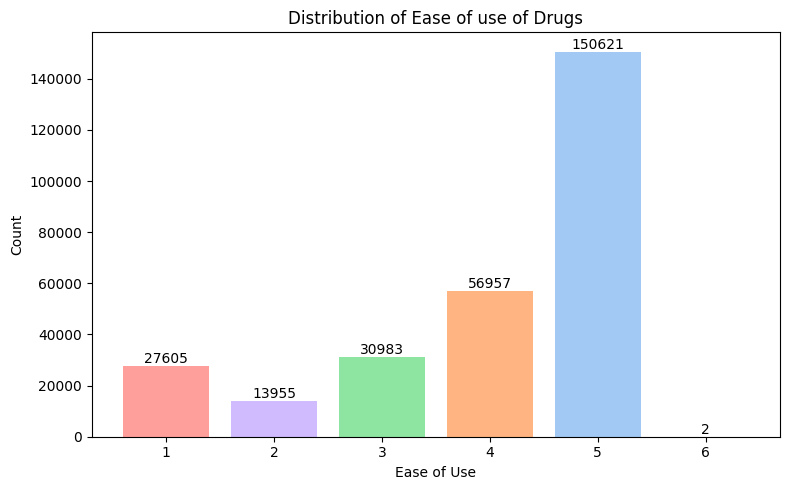

In [55]:
#EaseofUse

eou = df['EaseofUse'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(eou.index, eou.values, color = colors)
plt.xlabel('Ease of Use')
plt.ylabel('Count')
plt.title('Distribution of Ease of use of Drugs')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

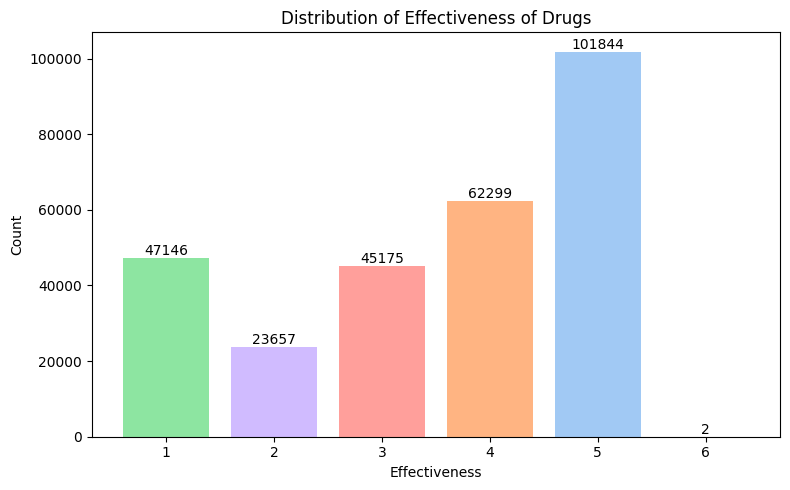

In [56]:
#Effectiveness

eff = df['Effectiveness'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(eff.index, eff.values, color = colors)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness of Drugs')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

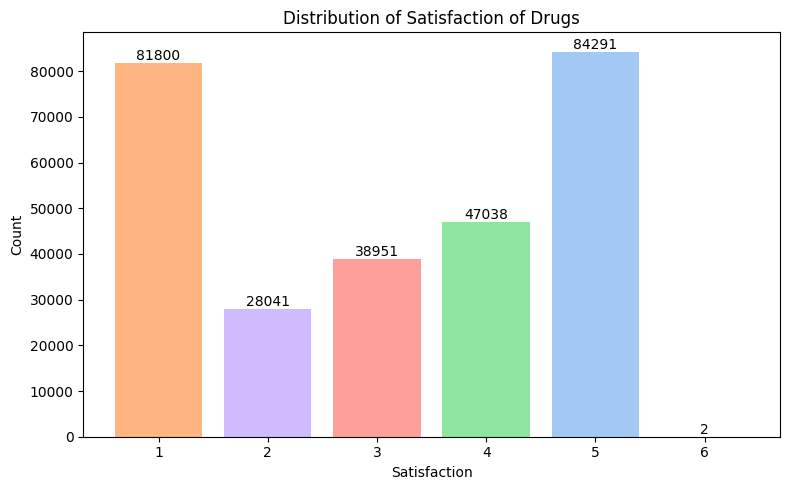

In [57]:
#Satisfaction

sat = df['Satisfaction'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(sat.index, sat.values, color = colors)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction of Drugs')
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

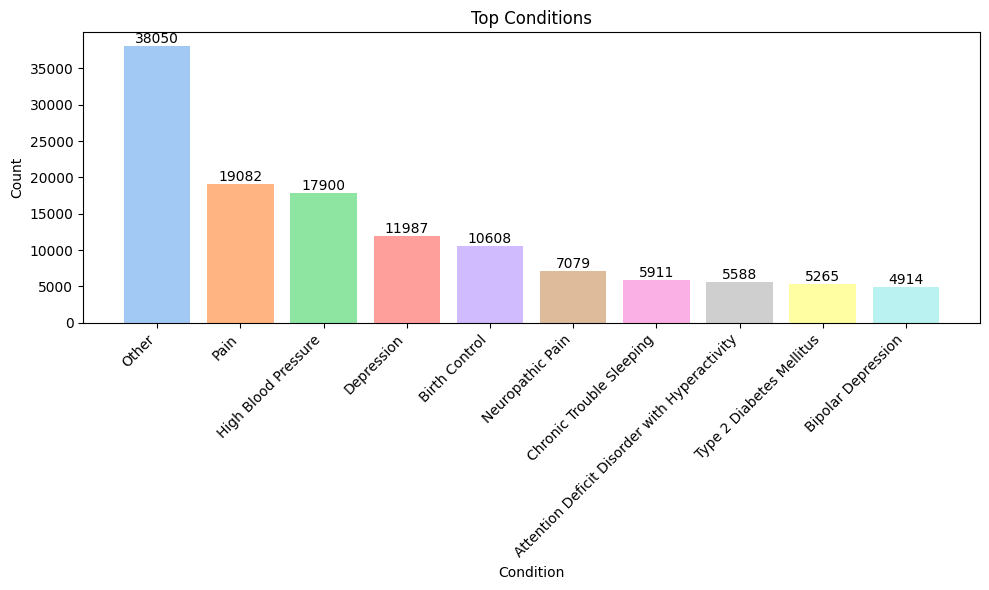

In [58]:
#Condition


# Get the value counts of conditions
condition_counts = df['Condition'].value_counts()

# Select the top N conditions to plot
N = 10  # Number of top conditions to display
top_conditions = condition_counts.head(N)

colors = sns.color_palette('pastel')

# Plot the top conditions
plt.figure(figsize=(10, 6))
bars = plt.bar(top_conditions.index, top_conditions.values, color = colors)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top Conditions')
plt.xticks(rotation=45, ha='right')

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

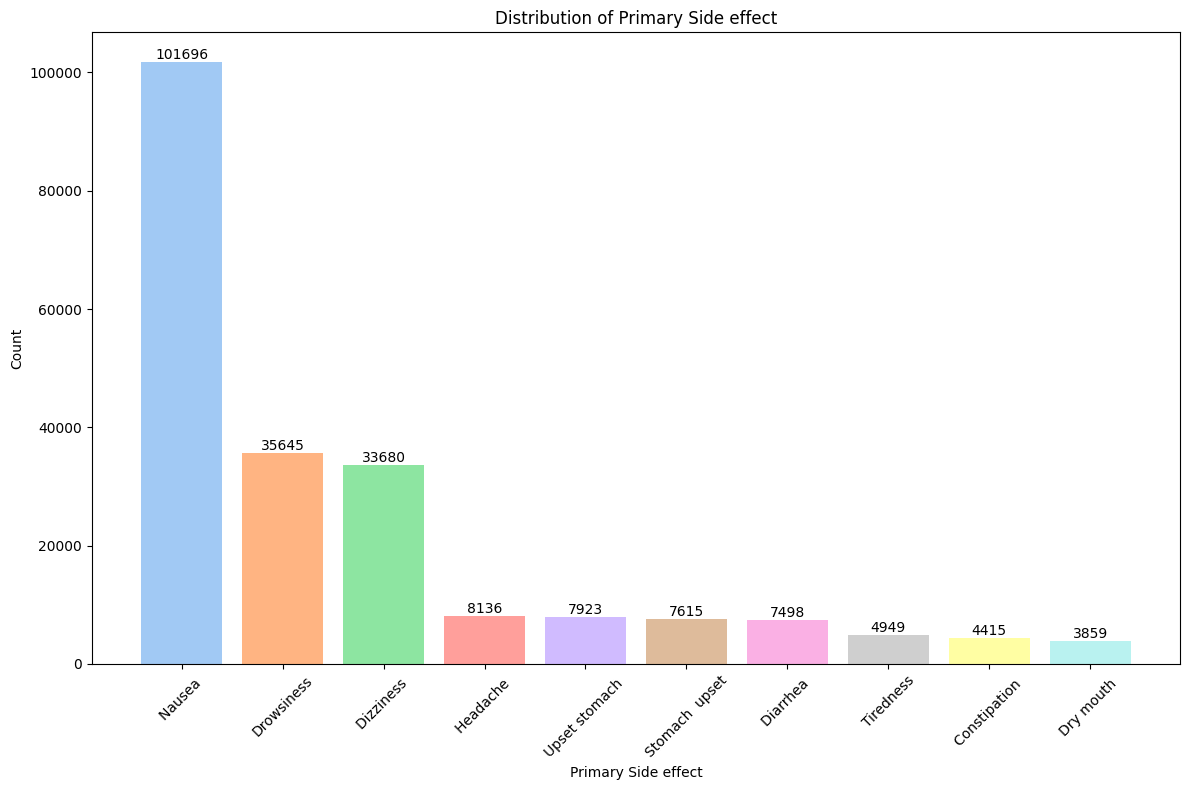

In [59]:
#Side 1


side1_count = df['Side 1'].value_counts()

# Get the top 25 drugs
top_10_side1 = side1_count.head(10)

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_side1.index, top_10_side1.values, color = colors)
plt.xlabel('Primary Side effect')
plt.ylabel('Count')
plt.title('Distribution of Primary Side effect')
plt.xticks(rotation=45)
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

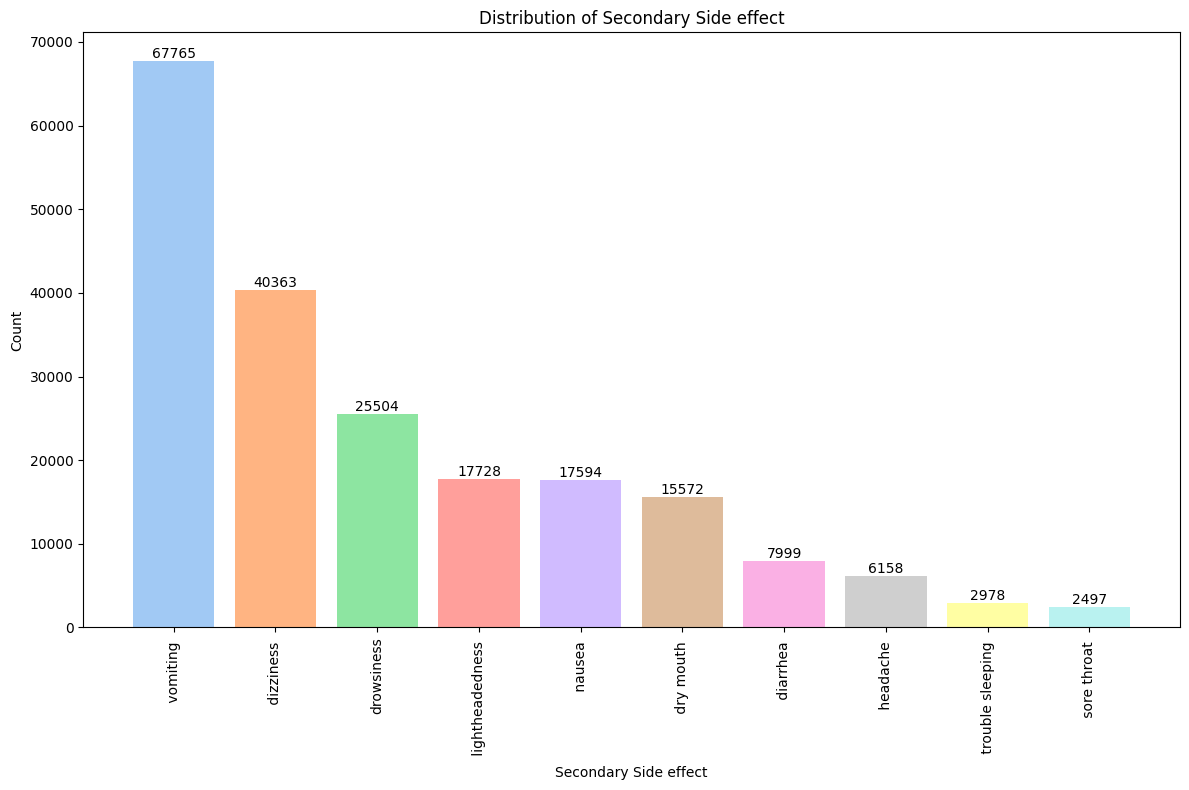

In [60]:
#Side 2


side2_count = df['Side 2'].value_counts()

# Get the top 25 drugs
top_10_side2 = side2_count.head(10)

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_side2.index, top_10_side2.values, color = colors)
plt.xlabel('Secondary Side effect')
plt.ylabel('Count')
plt.title('Distribution of Secondary Side effect')
plt.xticks(rotation=90)
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

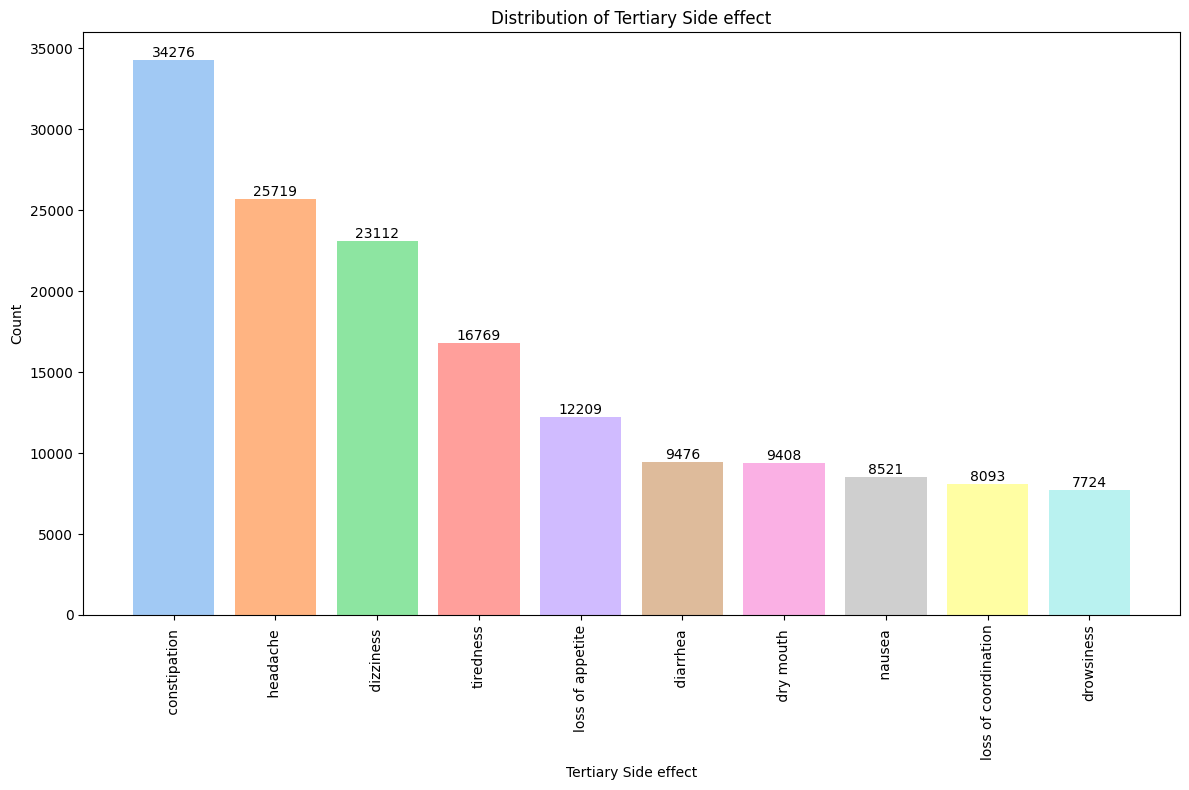

In [61]:
#Side 3


side3_count = df['Side 3'].value_counts()

# Get the top 25 drugs
top_10_side3 = side3_count.head(10)

colors = sns.color_palette('pastel')

# Create a bar plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_side3.index, top_10_side3.values, color = colors)
plt.xlabel('Tertiary Side effect')
plt.ylabel('Count')
plt.title('Distribution of Tertiary Side effect')
plt.xticks(rotation=90)
plt.tight_layout()

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Display the plot
plt.show()

In [62]:
df.columns

Index(['name', 'race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'Side 1', 'Side 2', 'Side 3', 'Side 4',
       'Side 5', 'Side 6', 'Side 7', 'Side 8', 'Side 9', 'Side 10', 'Side 11',
       'Side 12', 'Side 13', 'Side 14', 'Side 15', 'Side 16', 'Side 17',
       'No.of Side effects', 'Severity of Side effects'],
      dtype='object')

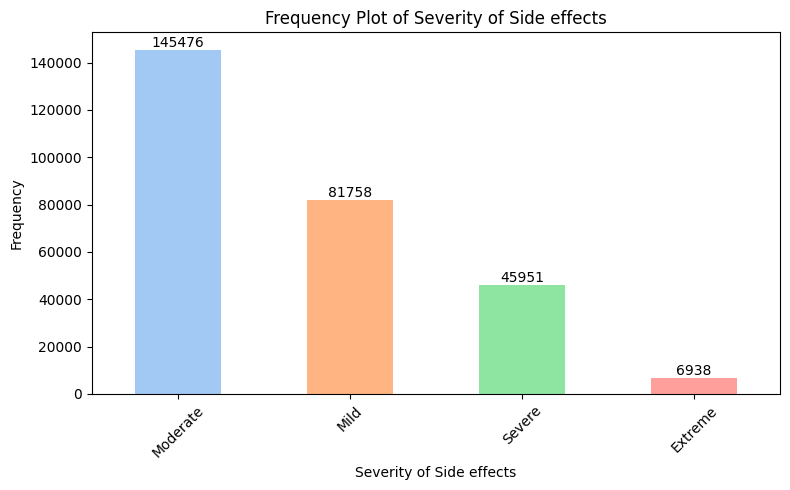

In [63]:
#Severity of Side effects

# Calculate the frequency of each severity level
severity_counts = df['Severity of Side effects'].value_counts()

# Define the colors for the bars
colors = sns.color_palette('pastel')

# Plot the frequency of severity levels with different colors
plt.figure(figsize=(8, 5))
ax = severity_counts.plot(kind='bar', color=colors)
plt.xlabel('Severity of Side effects')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Severity of Side effects')
plt.xticks(rotation=45)
plt.tight_layout()


# Add count values above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

#### **Bivariate Plots**

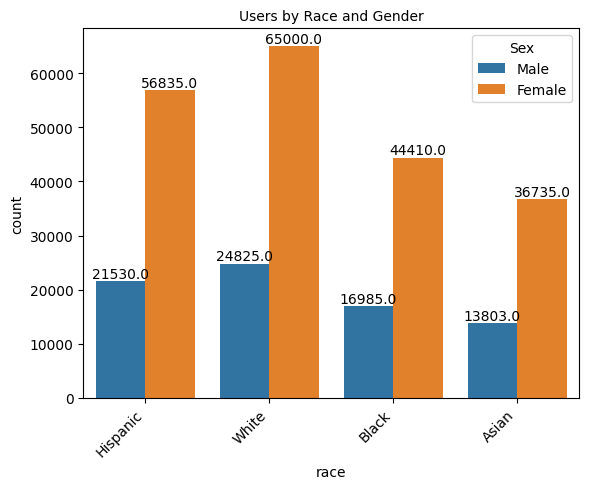

In [64]:

# Create the countplot
sns.countplot(x='race', hue='Sex', data=df)

# Set the plot title
plt.title("Users by Race and Gender", fontsize=10)

# Adjust the position and rotation of x-axis labels
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Display the plot
plt.show()


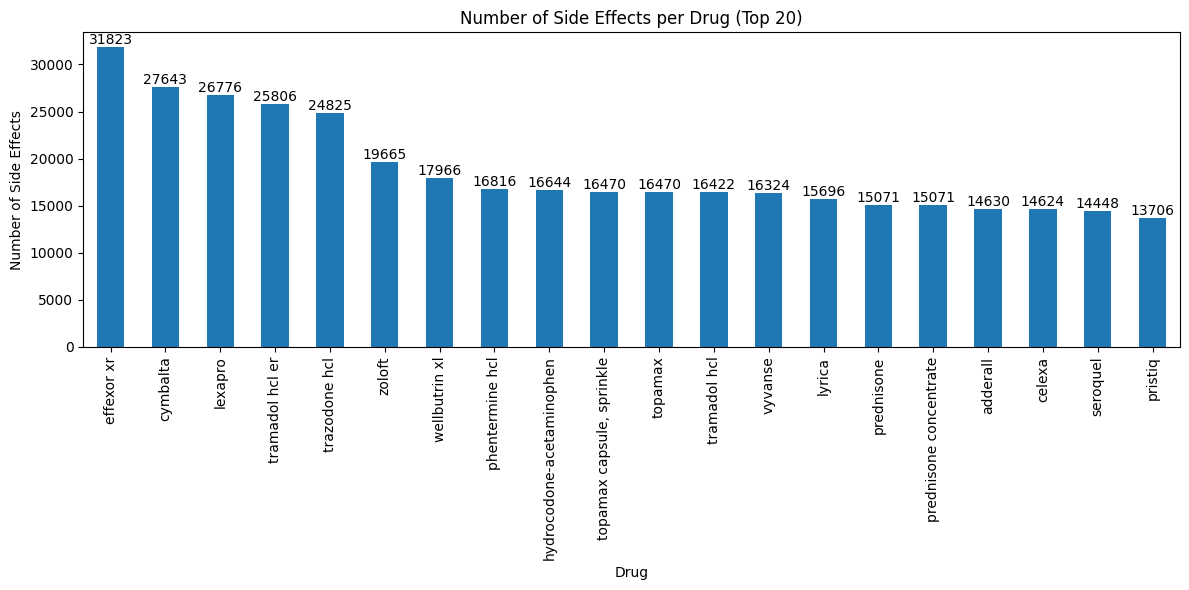

In [65]:
# Group the data by drug and calculate the sum of side effects
side_effects_per_drug = df.groupby('Drug')['No.of Side effects'].sum().sort_values(ascending=False)

# Select the top 20 drugs
top_20_drugs = side_effects_per_drug.head(20)

# Plot the number of side effects per drug (top 20)
plt.figure(figsize=(12, 6))
ax = top_20_drugs.plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Number of Side Effects')
plt.title('Number of Side Effects per Drug (Top 20)')
plt.xticks(rotation=90)
plt.tight_layout()

# Add value counts above each bar
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

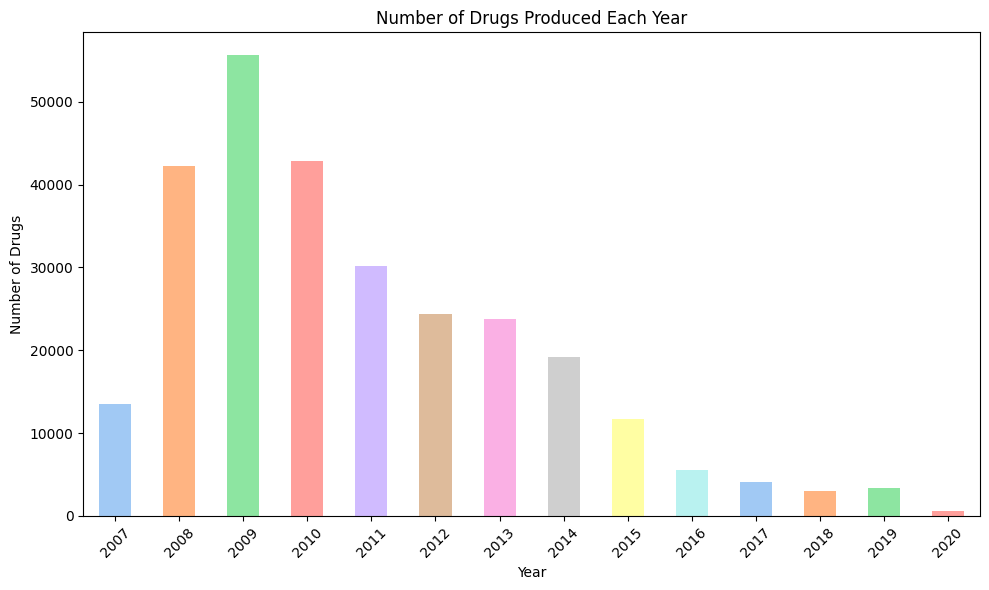

In [66]:
# Group the data by year and calculate the count of drugs
drugs_per_year = df.groupby('Year')['Drug'].count()

colors = sns.color_palette('pastel')

# Plot the number of drugs produced each year
plt.figure(figsize=(10, 6))
drugs_per_year.plot(kind='bar', color = colors)
plt.xlabel('Year')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs Produced Each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

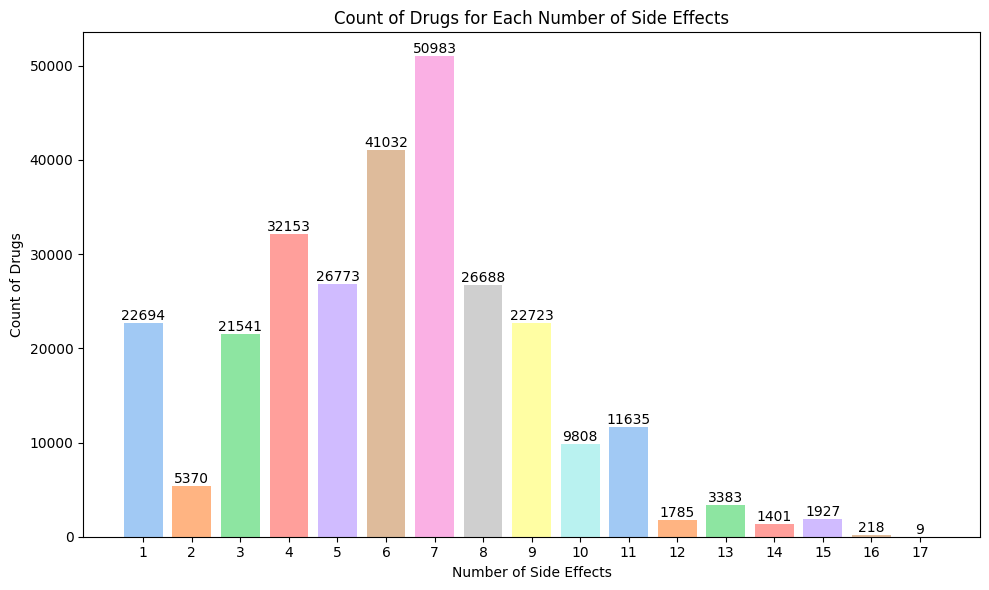

In [67]:
# Calculate the count of drugs for each number of side effects
count_per_side_effects = df['No.of Side effects'].value_counts().sort_index()

colors = sns.color_palette('pastel')

# Plot the count of drugs for each number of side effects
plt.figure(figsize=(10, 6))
bars = plt.bar(count_per_side_effects.index, count_per_side_effects.values, color = colors)
plt.xlabel('Number of Side Effects')
plt.ylabel('Count of Drugs')
plt.title('Count of Drugs for Each Number of Side Effects')

# Set the x-axis tick interval
x_ticks = range(min(count_per_side_effects.index), max(count_per_side_effects.index) + 1, 1)
plt.xticks(x_ticks)

# Add count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### **Multivariate plots**

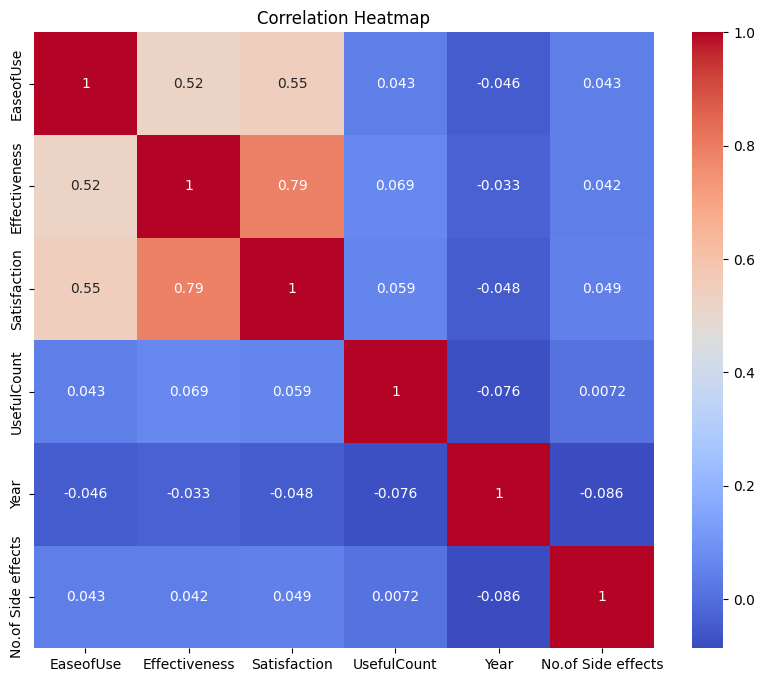

In [70]:
columns = ['Age', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'Year', 'No.of Side effects']
num_cols = df[columns]
correlation_matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()